Required Packages for Analysis

In [3]:
# Importing relevant packages
import numpy as np # For general use and calculations
import pandas as pd # For dataframes
from IPython.display import display # For cleaner printing of data
import matplotlib.pyplot as plt # For visualizations
from sklearn.cluster import AgglomerativeClustering # For bottom up Hierarchical Clustering
import gower # For utilizing Gower's Distance
from scipy.spatial.distance import squareform # For converting Gower's Distance into a condensed format
from sklearn.metrics import silhouette_score # For identifying optimal amount of clusters 
import umap.umap_ as umap # For dimensionality reduction and visualization of clusters

Part 1: Data Preparation & Preprocessing

In [5]:
# Importing Dataset
file_location = "C:/Users/bconn/OneDrive/Documents/WGUCoursework/Data/medical_clean.csv"
data = pd.read_csv(file_location)
df = data.copy()

In [6]:
# Initial profiling of data
display(df.info())
print ('\n')
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

None

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.097200,53.511700,40490.495160,17.964262,5.012200,...,5312.172769,12934.528587,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.163659,20.638538,28521.153293,2.017231,1.045734,...,2180.393838,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209700,0.000000,0.000000,18.000000,154.080000,9.806483,1.000000,...,1938.312067,3125.703000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,36.000000,19598.775000,16.626439,4.000000,...,3179.374015,7986.487755,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33768.420000,17.951122,5.000000,...,5213.952000,11573.977735,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54296.402500,19.347963,6.000000,...,7459.699750,15626.490000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.100000,26.394449,9.000000,...,9180.728000,30566.070000,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
# Removing columns not related to health conditions, personal decisions, or treatment received
df = df.drop(['CaseOrder', 'Zip', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender','Initial_days',
       'TotalCharge', 'Additional_charges', 'Item1', 'Item2', 'Item3', 'Item4',
       'Item5', 'Item6', 'Item7', 'Item8'], axis=1)

In [8]:
# Standardizing Column Header names
df.columns = df.columns.str.lower().str.replace(" ", "_")

In [9]:
# Checking for null values
print(df.isnull().sum())

readmis               0
vitd_levels           0
doc_visits            0
full_meals_eaten      0
vitd_supp             0
soft_drink            0
initial_admin         0
highblood             0
stroke                0
complication_risk     0
overweight            0
arthritis             0
diabetes              0
hyperlipidemia        0
backpain              0
anxiety               0
allergic_rhinitis     0
reflux_esophagitis    0
asthma                0
services              0
dtype: int64


In [10]:
# Profiling Data before encoding values
display(df.info())
print ('\n')
display(df.describe(include=['object']))
print ('\n')
print("Reasons Initially Admitted: ", df['initial_admin'].unique())
print("Level of Complication Risks: ", df['complication_risk'].unique())
print("Primary Services Received while Admitted: ", df['services'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   readmis             10000 non-null  object 
 1   vitd_levels         10000 non-null  float64
 2   doc_visits          10000 non-null  int64  
 3   full_meals_eaten    10000 non-null  int64  
 4   vitd_supp           10000 non-null  int64  
 5   soft_drink          10000 non-null  object 
 6   initial_admin       10000 non-null  object 
 7   highblood           10000 non-null  object 
 8   stroke              10000 non-null  object 
 9   complication_risk   10000 non-null  object 
 10  overweight          10000 non-null  object 
 11  arthritis           10000 non-null  object 
 12  diabetes            10000 non-null  object 
 13  hyperlipidemia      10000 non-null  object 
 14  backpain            10000 non-null  object 
 15  anxiety             10000 non-null  object 
 16  aller

None

,readmis,soft_drink,initial_admin,highblood,stroke,complication_risk,overweight,arthritis,diabetes,hyperlipidemia,backpain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,2,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4
top,No,No,Emergency Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,6331,7425,5060,5910,8007,4517,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265




Reasons Initially Admitted:  ['Emergency Admission' 'Elective Admission' 'Observation Admission']
Level of Complication Risks:  ['Medium' 'High' 'Low']
Primary Services Received while Admitted:  ['Blood Work' 'Intravenous' 'CT Scan' 'MRI']


In [11]:
# Encoding data

# Changing binary columns to numerical values
cols_to_binary = ['readmis', 'soft_drink', 'highblood', 'stroke', 'overweight', 'arthritis', 
'diabetes', 'hyperlipidemia', 'backpain', 'anxiety', 'allergic_rhinitis', 'reflux_esophagitis', 'asthma']

for col in cols_to_binary:
    df[col] = df[col].map({'No': 0, 'Yes': 1})

# One-Hot Encoding (Initial Admission, Primary Services)
df = pd.get_dummies(df, columns=["initial_admin", "services"], drop_first=True)

## Converting new boolean columns to 0 and 1
boolean_cols = ['initial_admin_Emergency Admission', 'initial_admin_Observation Admission',
             'services_CT Scan', 'services_Intravenous', 'services_MRI']
df[boolean_cols] = df[boolean_cols].astype(int) 
    
# Ordinal Encoding (Complication Risks)
complication_risk_mapping = {'Low' : 0, 'Medium': 1, 'High': 2}
df['complication_risk'] = df['complication_risk'].map(complication_risk_mapping)

In [12]:
print(df.columns)

Index(['readmis', 'vitd_levels', 'doc_visits', 'full_meals_eaten', 'vitd_supp',
       'soft_drink', 'highblood', 'stroke', 'complication_risk', 'overweight',
       'arthritis', 'diabetes', 'hyperlipidemia', 'backpain', 'anxiety',
       'allergic_rhinitis', 'reflux_esophagitis', 'asthma',
       'initial_admin_Emergency Admission',
       'initial_admin_Observation Admission', 'services_CT Scan',
       'services_Intravenous', 'services_MRI'],
      dtype='object')


In [13]:
# Validation data cleaning worked properly

## Binary Columns:
for col in cols_to_binary:
    print(f"Unique values in {col}: {df[col].unique()}")

## One-hot Encoding:
print("\n")
display(df.columns)

## Ordinal Encoding:
print("\n")
display(df['complication_risk'].unique())

## Confirming no NaN Values:
print("\nNumber of NaN Values:")
display(df.isnull().sum().sum())

Unique values in readmis: [0 1]
Unique values in soft_drink: [0 1]
Unique values in highblood: [1 0]
Unique values in stroke: [0 1]
Unique values in overweight: [0 1]
Unique values in arthritis: [1 0]
Unique values in diabetes: [1 0]
Unique values in hyperlipidemia: [0 1]
Unique values in backpain: [1 0]
Unique values in anxiety: [1 0]
Unique values in allergic_rhinitis: [1 0]
Unique values in reflux_esophagitis: [0 1]
Unique values in asthma: [1 0]




Index(['readmis', 'vitd_levels', 'doc_visits', 'full_meals_eaten', 'vitd_supp',
       'soft_drink', 'highblood', 'stroke', 'complication_risk', 'overweight',
       'arthritis', 'diabetes', 'hyperlipidemia', 'backpain', 'anxiety',
       'allergic_rhinitis', 'reflux_esophagitis', 'asthma',
       'initial_admin_Emergency Admission',
       'initial_admin_Observation Admission', 'services_CT Scan',
       'services_Intravenous', 'services_MRI'],
      dtype='object')

array([1, 2, 0], dtype=int64)


Number of NaN Values:


0

In [14]:
# Final Profiling
display(df.info())
display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   readmis                              10000 non-null  int64  
 1   vitd_levels                          10000 non-null  float64
 2   doc_visits                           10000 non-null  int64  
 3   full_meals_eaten                     10000 non-null  int64  
 4   vitd_supp                            10000 non-null  int64  
 5   soft_drink                           10000 non-null  int64  
 6   highblood                            10000 non-null  int64  
 7   stroke                               10000 non-null  int64  
 8   complication_risk                    10000 non-null  int64  
 9   overweight                           10000 non-null  int64  
 10  arthritis                            10000 non-null  int64  
 11  diabetes                     

None

,readmis,vitd_levels,doc_visits,full_meals_eaten,vitd_supp,soft_drink,highblood,stroke,complication_risk,overweight,...,backpain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,initial_admin_Emergency Admission,initial_admin_Observation Admission,services_CT Scan,services_Intravenous,services_MRI
0,0,19.141466,6,0,0,0,1,0,1,0,...,1,1,1,0,1,1,0,0,0,0
1,0,18.940352,4,2,1,0,1,0,2,1,...,0,0,0,1,0,1,0,0,1,0
2,0,18.057507,4,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,16.576858,4,1,0,0,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,17.439069,5,0,2,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [15]:
# Exporting encoded dataset
## df.to_csv("encoded_data.csv")

Part 2: Clustering

In [17]:
# Calculating and condensing Gower's Distance
gower_dist = gower.gower_matrix(df)  
gower_dist_condensed = squareform(gower_dist, checks=False)  

In [63]:
# Utilizing Silhouette Score to identify optimal cluster amount
best_clusters = 2
best_score = -1
for k in range(2, 11):
    cluster_model = AgglomerativeClustering(n_clusters=k, metric="precomputed", linkage="complete")
    cluster_labels = cluster_model.fit_predict(gower_dist)

    score = silhouette_score(gower_dist, cluster_labels, metric="precomputed")
    
    if score > best_score:
        best_score = score
        best_clusters = k

print(f"Optimal number of clusters: {best_clusters}")

Optimal number of clusters: 2


In [20]:
#  Manually reviewing cluster distributions across different k-values
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10]:  
    cluster_model = AgglomerativeClustering(n_clusters=k, metric="precomputed", linkage="complete")
    cluster_labels = cluster_model.fit_predict(gower_dist) 
    
    print(f"\nCluster counts for k={k}:")
    print(pd.Series(cluster_labels).value_counts())


Cluster counts for k=2:
0    7553
1    2447
Name: count, dtype: int64

Cluster counts for k=3:
0    4889
2    2664
1    2447
Name: count, dtype: int64

Cluster counts for k=4:
0    3478
2    2664
1    2447
3    1411
Name: count, dtype: int64

Cluster counts for k=5:
0    2664
1    2447
2    1784
4    1694
3    1411
Name: count, dtype: int64

Cluster counts for k=6:
1    2447
2    1784
4    1694
5    1631
3    1411
0    1033
Name: count, dtype: int64

Cluster counts for k=7:
1    2447
0    1784
4    1694
2    1631
3    1411
5     838
6     195
Name: count, dtype: int64

Cluster counts for k=8:
0    2447
4    1694
2    1631
3    1411
1    1057
5     838
7     727
6     195
Name: count, dtype: int64

Cluster counts for k=9:
4    1694
0    1631
2    1566
3    1411
1    1057
8     881
5     838
7     727
6     195
Name: count, dtype: int64

Cluster counts for k=10:
4    1694
2    1566
1    1411
0    1057
8     881
9     851
5     838
3     780
7     727
6     195
Name: count, dtype: int64


In [50]:
# Adding and Assigning final cluster value and labels
final_k = 5  
cluster_model = AgglomerativeClustering(n_clusters=final_k, metric="precomputed", linkage="complete")
df["Cluster"] = cluster_model.fit_predict(gower_dist)  

In [56]:
# Showing final Cluster Count and key feature differences across clusters
print("\nFinal Cluster Counts:")
print(df["Cluster"].value_counts())
print("\nCluster Summary Statistics:")
display(df.groupby("Cluster").mean())


Final Cluster Counts:
Cluster
0    2664
1    2447
2    1784
4    1694
3    1411
Name: count, dtype: int64

Cluster Summary Statistics:


,readmis,vitd_levels,doc_visits,full_meals_eaten,vitd_supp,soft_drink,highblood,stroke,complication_risk,overweight,...,backpain,anxiety,allergic_rhinitis,reflux_esophagitis,asthma,initial_admin_Emergency Admission,initial_admin_Observation Admission,services_CT Scan,services_Intravenous,services_MRI
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.426802,17.979880,5.006381,1.019520,0.406532,0.285661,0.472222,0.164039,1.132508,0.602102,...,0.382883,0.402402,0.587087,0.520270,0.275150,0.625000,0.106231,0.088964,0.335210,0.045796
1,0.359215,17.929719,5.029424,1.000817,0.384961,0.200654,0.434001,0.196159,1.106661,0.775235,...,0.410298,0.293421,0.379240,0.404986,0.326931,0.045770,0.733143,0.100123,0.273396,0.030241
2,0.292601,17.951214,5.025224,0.980942,0.383408,0.434417,0.365471,0.182175,1.163117,0.779148,...,0.417601,0.182735,0.360987,0.375561,0.356502,0.697870,0.080717,0.128363,0.311659,0.040359
3,0.271439,17.932773,4.958894,0.997874,0.413182,0.158044,0.259391,0.241673,1.116230,0.739901,...,0.471297,0.350106,0.368533,0.345145,0.264352,0.693834,0.060241,0.030475,0.619419,0.024805
4,0.441558,18.029568,5.027155,0.998229,0.411452,0.191854,0.443920,0.242031,1.096812,0.684179,...,0.401417,0.357143,0.168241,0.354782,0.207202,0.625148,0.076741,0.278040,0.081464,0.045455


Part 3: Visualizations + Results

In [ ]:
# Apply UMAP to reduce dimensionality to 2D for visualization
umap_model = umap.UMAP(n_components=2, metric="precomputed", n_neighbors=15, min_dist=0.3, random_state=42)
df_umap = umap_model.fit_transform(gower_dist)

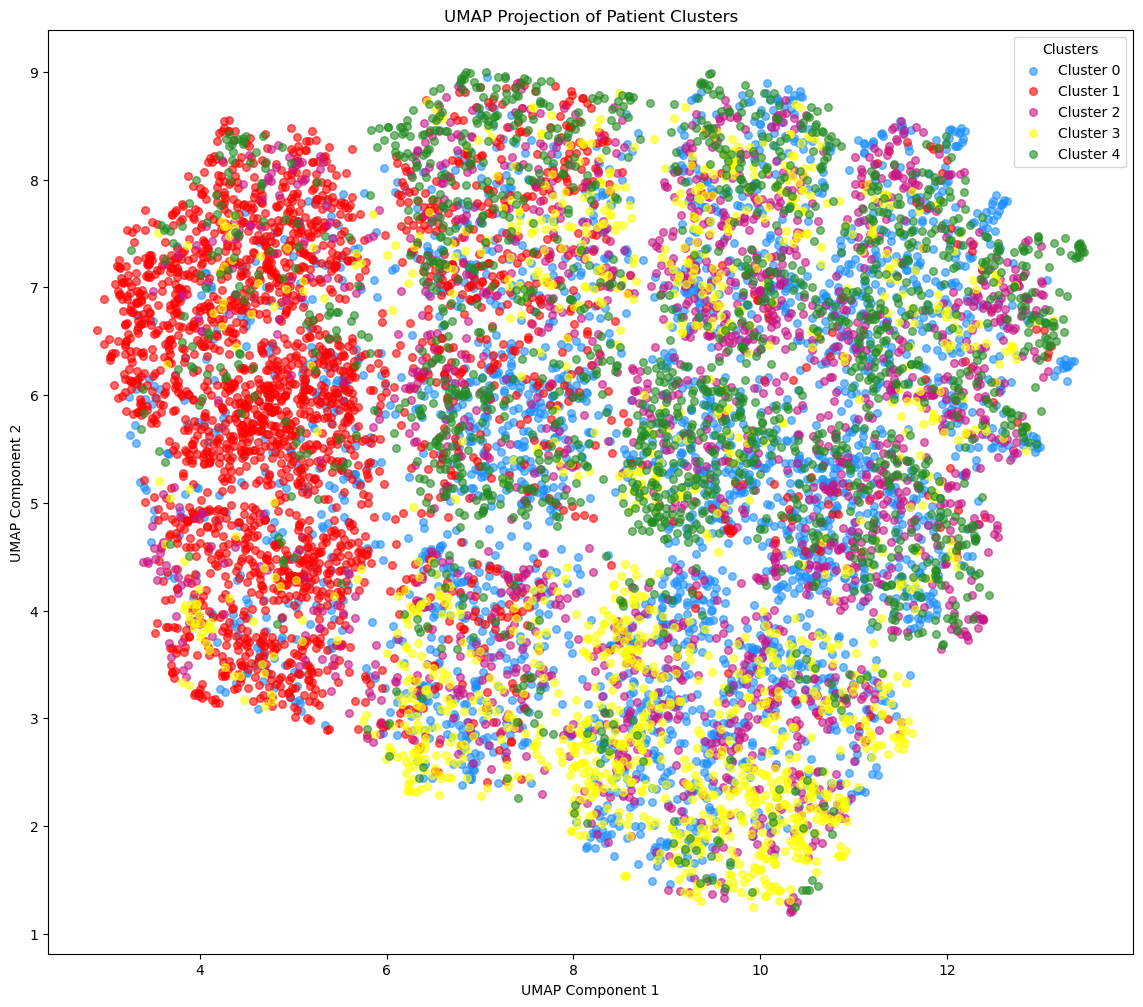

In [60]:
# Defining distinct colors for each cluster
cluster_colors = {
    0: "dodgerblue", 
    1: "red", 
    2: "mediumvioletred", 
    3: "yellow", 
    4: "forestgreen" 
}

# Plotting the Clusters after reducing dimensions
plt.figure(figsize=(14, 12))
plt.title("UMAP Projection of Patient Clusters")
for cluster, color in cluster_colors.items(): # 
    plt.scatter(
        df_umap[df["Cluster"] == cluster, 0], 
        df_umap[df["Cluster"] == cluster, 1], 
        color=color, 
        label=f"Cluster {cluster}",
        alpha=0.6, 
        s=30, 
    )
plt.xlabel("UMAP Component 1")
plt.ylabel("UMAP Component 2")
plt.legend(title="Clusters", loc="best")
plt.show()
